In [ ]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

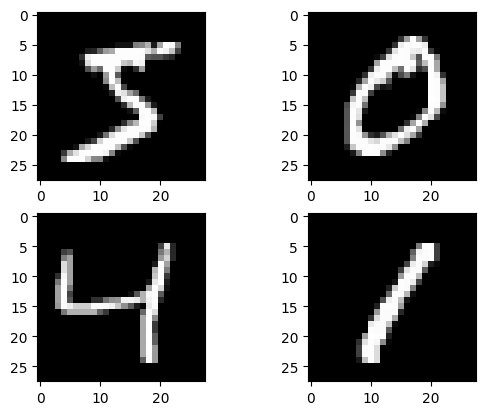

In [ ]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

In [ ]:
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 22s 66ms/step - loss: 0.0415 - val_loss: 0.0197
Epoch 2/10
300/300 [==============================] - 13s 44ms/step - loss: 0.0164 - val_loss: 0.0135
Epoch 3/10
300/300 [==============================] - 13s 43ms/step - loss: 0.0127 - val_loss: 0.0114
Epoch 4/10
300/300 [==============================] - 13s 43ms/step - loss: 0.0109 - val_loss: 0.0102
Epoch 5/10
300/300 [==============================] - 13s 43ms/step - loss: 0.0098 - val_loss: 0.0096
Epoch 6/10
300/300 [==============================] - 13s 43ms/step - loss: 0.0090 - val_loss: 0.0087
Epoch 7/10
300/300 [==============================] - 15s 50ms/step - loss: 0.0084 - val_loss: 0.0081
Epoch 8/10
300/300 [==============================] - 13s 43ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 9/10
300/300 [==============================] - 13s 43ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 10/10
300/300 [==============================] - 13s 44ms/step - loss: 0.007

In [ ]:
pred = model.predict(x_test_noisy)
pred.shape

313/313 [==============================] - 3s 8ms/step


(10000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255

Test Images


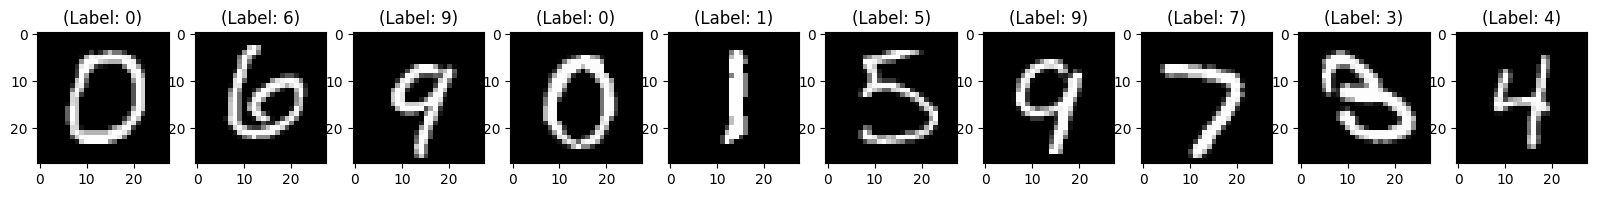

Test Images with Noise


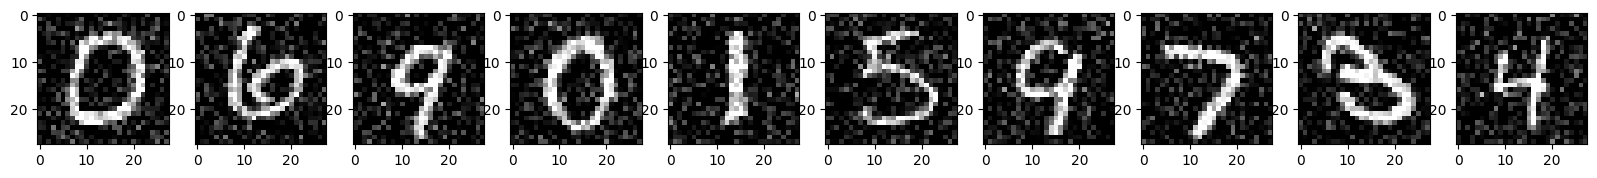

Reconstruction of Noisy Test Images


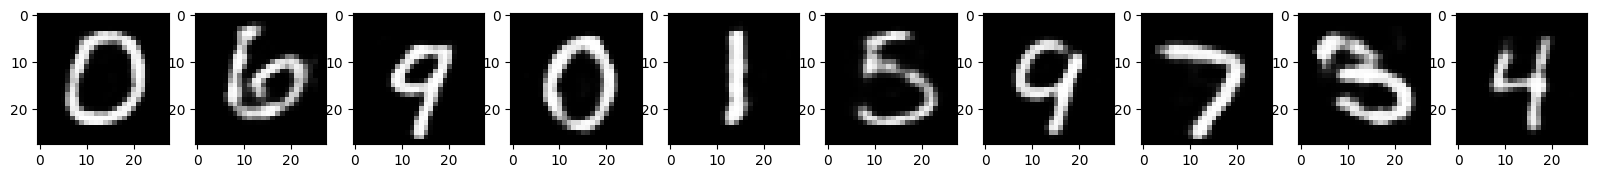

In [ ]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')
plt.show()

In [ ]:
pred

array([[[0.00583737, 0.00731822, 0.00976317, ..., 0.00243678,
         0.02636465, 0.01214581],
        [0.00061151, 0.00121041, 0.00091642, ..., 0.00988781,
         0.00048842, 0.00102609],
        [0.00919018, 0.00130114, 0.00077735, ..., 0.03889361,
         0.00118651, 0.07283714],
        ...,
        [0.01552276, 0.00784012, 0.00420383, ..., 0.09904138,
         0.00783584, 0.00157148],
        [0.00899836, 0.03019703, 0.00272464, ..., 0.01082502,
         0.00110384, 0.03263514],
        [0.00431419, 0.01290484, 0.00148126, ..., 0.00223621,
         0.20132795, 0.01363441]],

       [[0.00030121, 0.0040087 , 0.02317924, ..., 0.00241466,
         0.01183977, 0.00698344],
        [0.00778488, 0.00100871, 0.00270169, ..., 0.00985119,
         0.004428  , 0.01515282],
        [0.00029504, 0.00309721, 0.0022476 , ..., 0.01058384,
         0.00542075, 0.00191939],
        ...,
        [0.00788084, 0.00314159, 0.02288488, ..., 0.0007133 ,
         0.0084159 , 0.01745098],
        [0.0

In [ ]:
import numpy
from PIL import Image

In [ ]:
image_data =numpy.array([[[5.03427327e-05, 1.55964622e-03, 2.75412400e-04, ...,
         1.84128247e-02, 3.33641074e-03, 1.44657854e-03],
        [1.97010604e-03, 1.74030638e-03, 6.87670661e-03, ...,
         1.54337473e-03, 1.30364075e-04, 1.41066844e-02],
        [3.46164270e-05, 7.43405754e-03, 2.89839460e-03, ...,
         1.98801560e-03, 1.34327172e-04, 1.86637277e-04],
        ...,
        [8.98243161e-04, 2.72858033e-05, 7.56946218e-04, ...,
         1.15953066e-04, 1.53956629e-04, 6.28662237e-04],
        [1.69710908e-03, 8.19195900e-03, 5.00137801e-04, ...,
         1.15178979e-03, 2.99657346e-03, 2.01454153e-04],
        [3.49230436e-03, 1.04155391e-04, 1.37581956e-03, ...,
         3.48972564e-04, 1.69661187e-04, 1.54404610e-03]],

       ...,

       [[6.36447745e-04, 9.71557281e-04, 6.13246055e-04, ...,
         3.60199250e-03, 2.56142812e-03, 2.29315629e-04],
        [1.42952049e-04, 4.54828172e-04, 1.45859143e-04, ...,
         9.74628201e-04, 2.62144877e-05, 2.10646511e-04],
        [6.61981976e-05, 2.42700037e-02, 2.05197619e-04, ...,
         1.04175517e-02, 1.70754603e-04, 3.83771257e-04],
        ...,
        [5.51312789e-03, 7.78719201e-04, 1.19887404e-02, ...,
         7.24295806e-03, 1.54385320e-03, 1.31441385e-03],
        [3.80312922e-05, 1.62557550e-02, 1.94729900e-03, ...,
         1.33456833e-05, 1.29828346e-04, 3.32978647e-03],
        [5.42192953e-03, 4.05340506e-05, 5.92270553e-05, ...,
         6.14032615e-04, 2.36826949e-04, 1.69831689e-03]],

       [[2.57319082e-02, 1.57245563e-03, 1.12843318e-02, ...,
         2.97480654e-02, 1.37540046e-04, 3.29467613e-04],
        [1.92510925e-04, 1.99625478e-03, 1.31615112e-03, ...,
         5.93528850e-04, 1.15010560e-04, 5.36066073e-04],
        [8.47059593e-04, 3.51077542e-02, 1.79299107e-03, ...,
         1.41915409e-02, 1.39285316e-04, 4.89129452e-03],
        ...,
        [1.55306060e-03, 2.82173399e-02, 6.21240411e-04, ...,
         2.36297902e-02, 1.03338147e-02, 5.03692718e-04],
        [1.07656626e-04, 4.93237413e-02, 7.79663620e-04, ...,
         3.10192641e-04, 3.30310245e-03, 2.35702610e-04],
        [7.04784319e-02, 4.60487616e-04, 2.63598235e-03, ...,
         5.88452785e-05, 4.25258419e-03, 6.00125524e-04]],

       [[1.55374513e-03, 1.37517899e-02, 2.94994283e-02, ...,
         1.90976039e-02, 2.85226502e-03, 1.28998817e-03],
        [1.08902331e-03, 1.70132684e-04, 6.18478730e-02, ...,
         2.88509927e-03, 1.36093455e-04, 4.55684756e-04],
        [9.22142435e-03, 3.36136948e-03, 4.87705314e-04, ...,
         1.17907869e-02, 7.74758591e-05, 3.55324452e-03],
        ...,
        [3.38282622e-02, 5.82613721e-02, 5.03293658e-03, ...,
         1.80829242e-02, 2.22069602e-02, 3.74615239e-03],
        [1.36534206e-03, 3.17059681e-02, 1.88850448e-04, ...,
         5.45792573e-04, 2.27376334e-02, 2.84317555e-03],
        [1.26880929e-02, 3.44710825e-05, 4.62768912e-06, ...,
         2.77530984e-03, 4.88074031e-03, 2.15567113e-03]]])

<ipython-input-20-8f171a8cf825>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image_data =numpy.array([[[5.03427327e-05, 1.55964622e-03, 2.75412400e-04, ...,


In [ ]:
for i in range(len(pred)):
    rescaled_data = ((pred[i,:,:]) * 225).astype(numpy.uint8)
    pil_image = Image.fromarray(rescaled_data, 'L')
    image_filename = f'image_{i}.jpeg'
    pil_image.save(image_filename, 'JPEG')